In [2]:
pip install contextily

# 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import contextily as ctx
import plotly.express as px


**Connect Google drive with google colab**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the dataset and creating a dataframe.

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project/UK_Accident.csv')
print(df)

         Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
0                 0  200501BS00001               525680.0   
1                 1  200501BS00002               524170.0   
2                 2  200501BS00003               524520.0   
3                 3  200501BS00004               526900.0   
4                 4  200501BS00005               528060.0   
...             ...            ...                    ...   
1504145      464692       2.01E+12               310037.0   
1504146      464693       2.01E+12               321509.0   
1504147      464694       2.01E+12               321337.0   
1504148      464695       2.01E+12               323869.0   
1504149      464696       2.01E+12               314072.0   

         Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
0                      178240.0  -0.191170  51.489096             1   
1                      181650.0  -0.211708  51.520075             1   
2                      182240.0  -0.206458  51.525301 

# 2. Initial Data Analysis

## Dataset Overview

In [6]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


Information aboout the columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

Shape of dataframe

In [8]:
df.shape

(1504150, 33)

In [9]:
list(df.columns.values)

['Unnamed: 0',
 'Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location',
 'Year']

## Data Cleaning

In [10]:
df.drop(['Unnamed: 0','Accident_Index','LSOA_of_Accident_Location'], axis = 1, inplace = True)
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005


In [11]:
df.dropna(subset=['Location_Easting_OSGR','Time','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [12]:
print(df.isnull().sum())

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

###Accidents happend in years

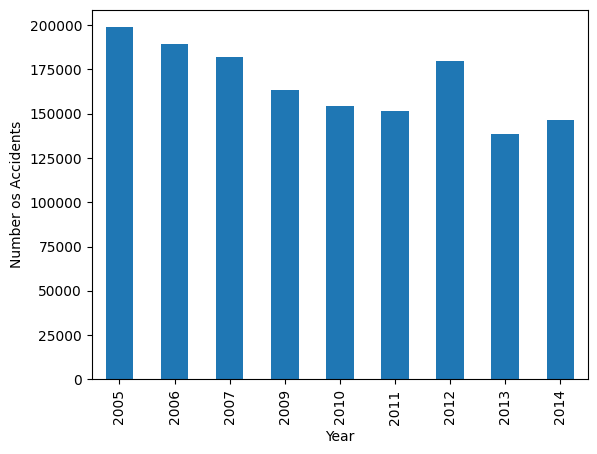

In [13]:
df['Year'].value_counts()[df.Year.unique()].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number os Accidents')
plt.show()

##Serveity of accident

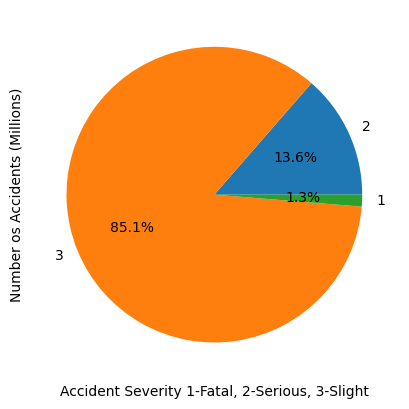

In [14]:
df['Accident_Severity'].value_counts()[df.Accident_Severity.unique()].plot(kind='pie',autopct='%1.1f%%', startangle=0, fontsize=10)
plt.xlabel('Accident Severity 1-Fatal, 2-Serious, 3-Slight')
plt.ylabel('Number os Accidents (Millions)')
plt.show()

## Accidents By weekly

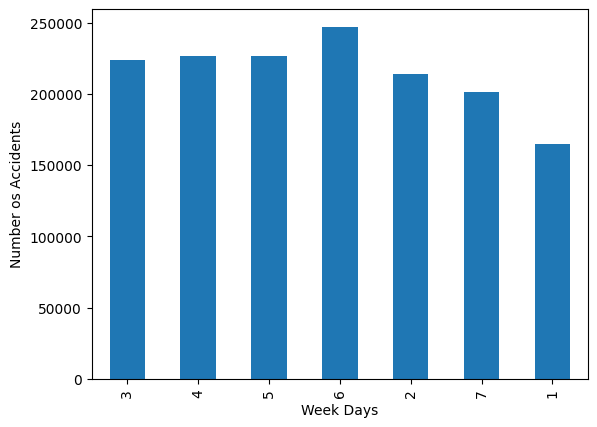

In [15]:
df_week_plot = df['Day_of_Week'].value_counts()[df.Day_of_Week.unique()]
df_week_plot.plot(kind='bar')
plt.xlabel('Week Days')
plt.ylabel('Number os Accidents')
plt.show()

## Accidents in different Weather Conditions

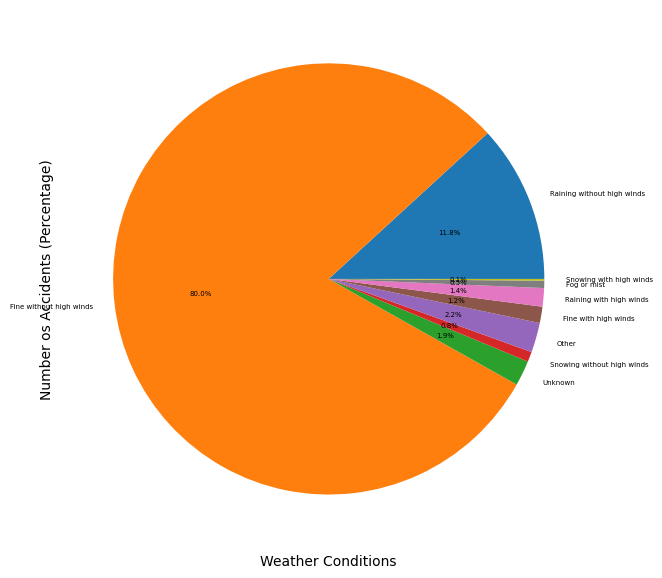

In [16]:
df_weather = df['Weather_Conditions'].value_counts()[df.Weather_Conditions.unique()]
plt.figure(figsize=(7, 7))
df_weather.plot(kind='pie',autopct='%1.1f%%', startangle=0, fontsize=5)
plt.xlabel('Weather Conditions')
plt.ylabel('Number os Accidents (Percentage)')
plt.show()

## Total number of Accidents in Light Conditions

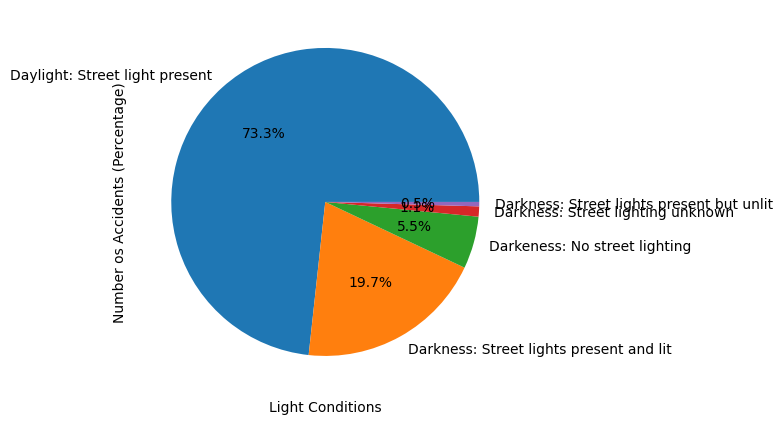

In [17]:
df_light = df['Light_Conditions'].value_counts()
plt.figure(figsize=(5, 5))
df_light.plot(kind='pie',autopct='%1.1f%%', startangle=0, fontsize=10)
plt.xlabel('Light Conditions')
plt.ylabel('Number os Accidents (Percentage)')
plt.show()

## Accident occured by Road Surface Conditions

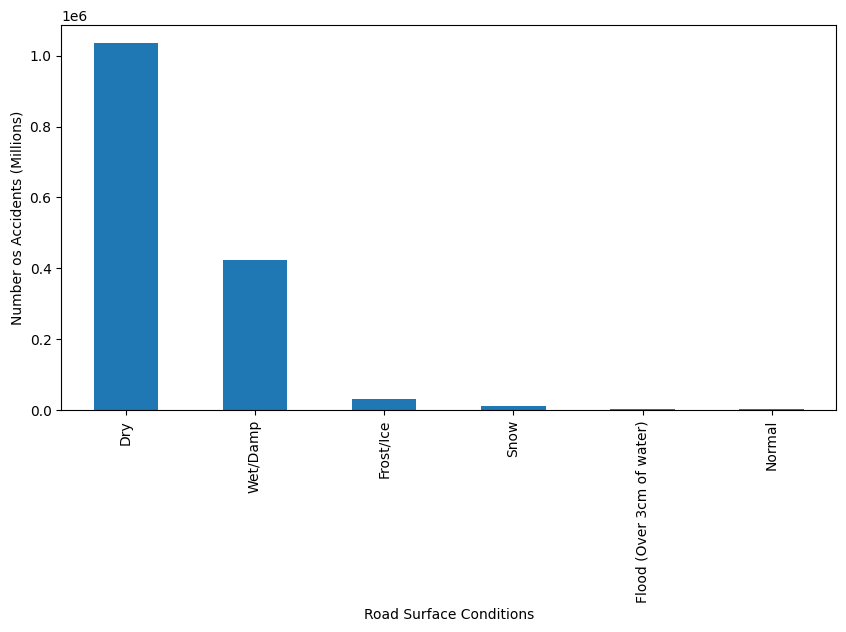

In [18]:
df_road = df['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(10, 5))
df_road.plot(kind='bar')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number os Accidents (Millions)')
plt.show()

## Accident in Urban or Rural Area

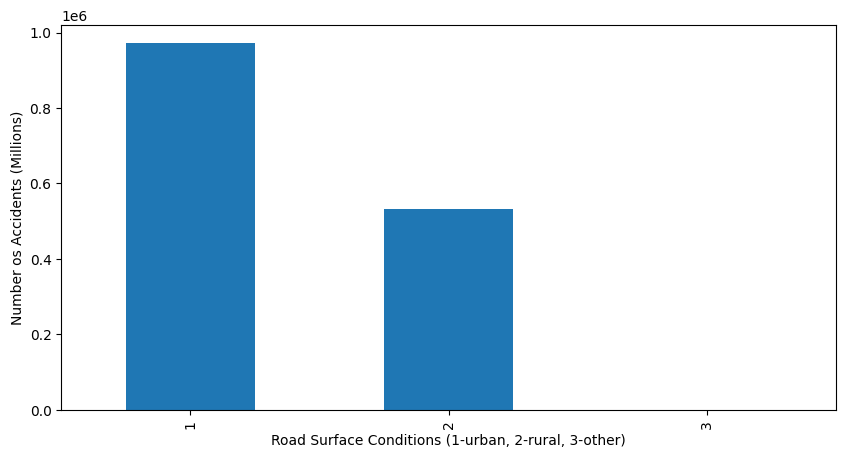

In [19]:
df_road_surface = df['Urban_or_Rural_Area'].value_counts()
plt.figure(figsize=(10, 5))
df_road_surface.plot(kind='bar')
plt.xlabel('Road Surface Conditions (1-urban, 2-rural, 3-other)')
plt.ylabel('Number os Accidents (Millions)')
plt.show()

## Did Police Officer Attend Scene of Accident?

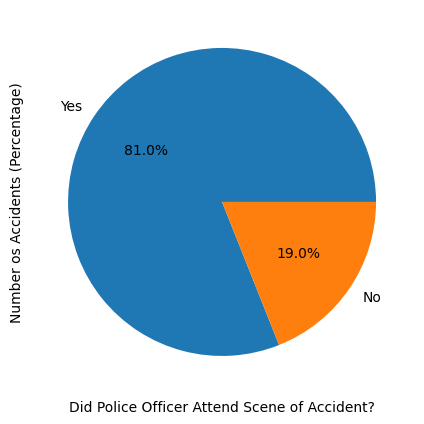

In [20]:
df_attend = df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()
plt.figure(figsize=(5, 5))
df_attend.plot(kind='pie',autopct='%1.1f%%', startangle=0, fontsize=10)
plt.xlabel('Did Police Officer Attend Scene of Accident?')
plt.ylabel('Number os Accidents (Percentage)')
plt.show()

## Accidents placed in UK

<ipython-input-21-9c984e8e4e4d>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


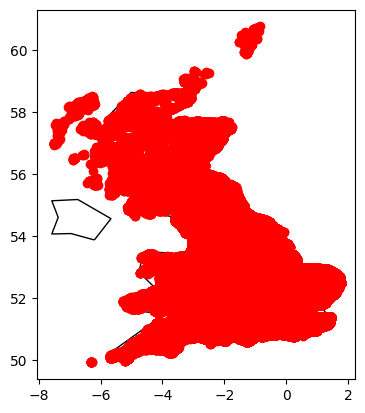

In [21]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[(world.name == "United Kingdom")].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()